In [1]:
# !pip install git+https://github.com/statsmodels/statsmodels
# %config Completer.use_jedi = False

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/property_listings_kuala_lumpur.csv')

df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [3]:
df.dtypes

Location          object
Price             object
Rooms             object
Bathrooms        float64
Car Parks        float64
Property Type     object
Size              object
Furnishing        object
dtype: object

In [4]:
df.isnull().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [5]:
df.dropna(inplace=True)
df = df.reset_index()
df = df.drop('index', axis=1)

df.shape

(31899, 8)

In [6]:
# Find, return all non-numeric characters and count it
df['Price'].str.findall(r'[^\d]').value_counts()

[R, M,  , ,]       17260
[R, M,  , ,, ,]    14633
[R, M,  ]              6
Name: Price, dtype: int64

In [7]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
2,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
3,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
4,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished


In [8]:
def replace_strings(string, replacements):
    for old, new in replacements.items():
        string = string.replace(old, new)
    return int(string)


str_rep = { 'R' : '',
            'M' : '',
            ' ' : '',
            ',' : ''  }

df['Price'] = df['Price'].apply(lambda x:replace_strings(x, str_rep))

df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
2,"Bukit Jalil, Kuala Lumpur",900000,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
3,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
4,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished


In [9]:
df['Rooms'].unique()

array(['2+1', '3', '4+1', '4+2', '5', '6+1', '3+2', '1', '3+1', '2', '6',
       '4', '1+1', '5+1', '2+2', 'Studio', '7+1', '7', '14', '5+2', '12',
       '7+', '8+', '8', '8+1', '13+', '20 Above', '10', '1+2', '9', '6+',
       '10+1', '15+', '9+1', '10+', '11', '13+1', '12+', '16', '13'],
      dtype=object)

In [10]:
def convert_rooms(a):
    if a.endswith("+") == True:
        return int(a[::-1])
    if bool(re.search(r'\d+\+\d+', a)) == True:
        return int(a.split('+')[0]) + int(a.split('+')[1])
    if a == "Studio":
        return 1
    if a == "20 Above":
        return int(a.split()[0])
    else:
        return int(a)
    
df['Rooms'] = df['Rooms'].apply(convert_rooms)

df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000,3,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
2,"Bukit Jalil, Kuala Lumpur",900000,5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
3,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,6,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
4,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished


In [11]:
df['area'] = df['Size'].apply(lambda i:i.split(':')[0])

def extract_size(a):
    if a.endswith('sq. ft.'):
        return a[:-7]
    if a.endswith('sq. m.'):
        return a[:-6]
    if a.endswith('acres'):
        return a[:-5]

df['size'] = df['Size'].apply(lambda i:i.split(':')[1]).apply(extract_size)



In [12]:
def extract_unit(a):
    if a.endswith('sq. ft.'):
        return a[-7:]
    else:
        return np.nan

df['unit'] = df['Size'].apply(lambda i:i.split(':')[1]).apply(extract_unit)

In [13]:
df['size'] = df['size'].apply(lambda x: x.replace(',', ''))

df['size'] = pd.to_numeric(df['size'], errors='coerce')

df.dropna(inplace=True)

In [14]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,area,size,unit
0,"KLCC, Kuala Lumpur",1250000,3,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,1335.0,sq. ft.
1,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,1875.0,sq. ft.
2,"Bukit Jalil, Kuala Lumpur",900000,5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,1513.0,sq. ft.
3,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,6,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200.0,sq. ft.
4,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,Land area,3600.0,sq. ft.


In [15]:
df.columns

Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing', 'area', 'size', 'unit'],
      dtype='object')

In [16]:
df = df[df['size']!=0]

df.reset_index(drop=True)

num = ['Price', 'Rooms', 'Bathrooms', 'Car Parks', 'size']

df.describe()

,Price,Rooms,Bathrooms,Car Parks,size
count,2.915800e+04,29158.000000,29158.000000,29158.000000,29158.000000
mean,1.595129e+06,3.467179,2.872351,1.951986,2180.281816
std,2.205096e+06,1.438763,1.525974,1.299676,9902.053420
min,3.080000e+02,1.000000,1.000000,1.000000,1.280000
25%,5.500000e+05,3.000000,2.000000,1.000000,990.000000
50%,8.800000e+05,3.000000,2.000000,2.000000,1281.000000
75%,1.700000e+06,4.000000,4.000000,2.000000,1996.000000
max,5.128101e+07,51.000000,20.000000,30.000000,820000.000000


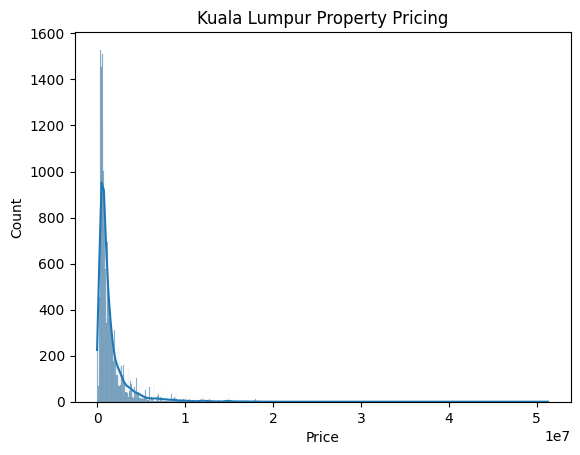

In [17]:
#plt.figure(figsize=(12,8))

sns.histplot(data=df, x='Price', kde=True, bins=1000)

plt.title("Kuala Lumpur Property Pricing")

plt.show()

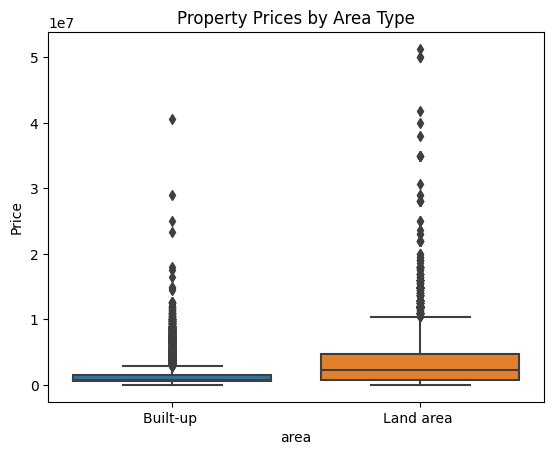

In [18]:
#plt.figure(figsize=(12,8))

sns.boxplot(data=df, x='area', y='Price')

plt.title('Property Prices by Area Type')

plt.show()

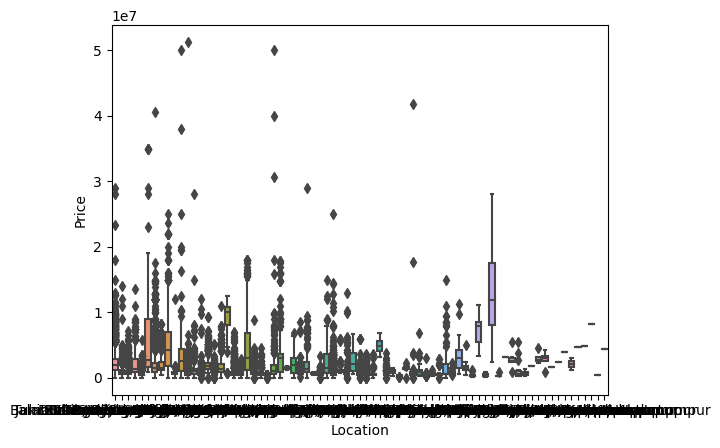

In [43]:
sns.boxplot(data=df, x='Location', y='Price')
plt.show()

In [21]:
df.corr()

,Price,Rooms,Bathrooms,Car Parks,size
Price,1.000000,0.550053,0.662828,0.609344,0.196542
Rooms,0.550053,1.000000,0.832448,0.649324,0.148427
Bathrooms,0.662828,0.832448,1.000000,0.665429,0.158671
Car Parks,0.609344,0.649324,0.665429,1.000000,0.165557
size,0.196542,0.148427,0.158671,0.165557,1.000000
